In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
import itertools  # Add this import

In [ ]:
data = pd.read_csv("diabetes.csv")
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Test Accuracy: 72.73%
Best max_iter: 100, Best eta0: 0.001, Best tol: 1e-05


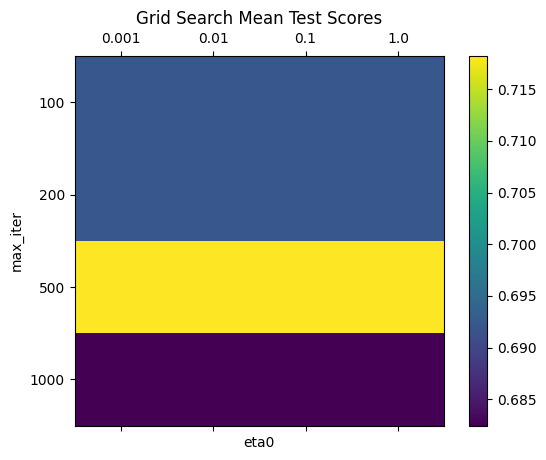

Normalized confusion matrix
[[0.74747475 0.25252525]
 [0.30909091 0.69090909]]


<Figure size 640x480 with 0 Axes>

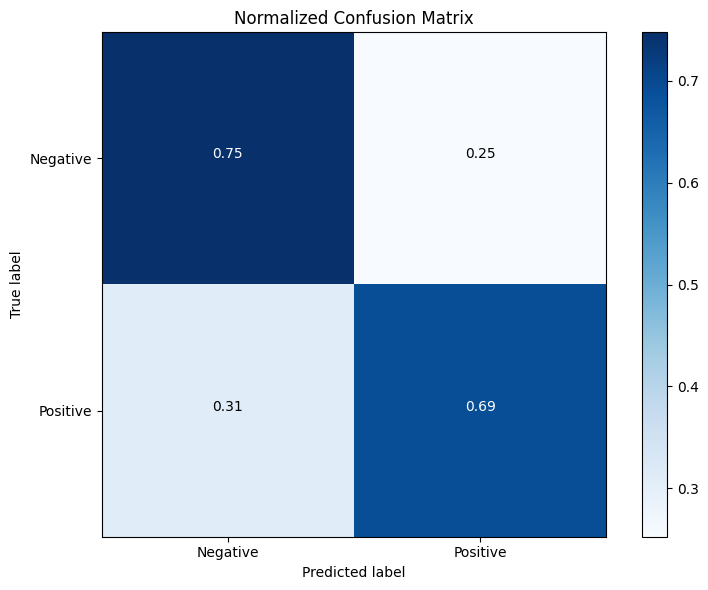

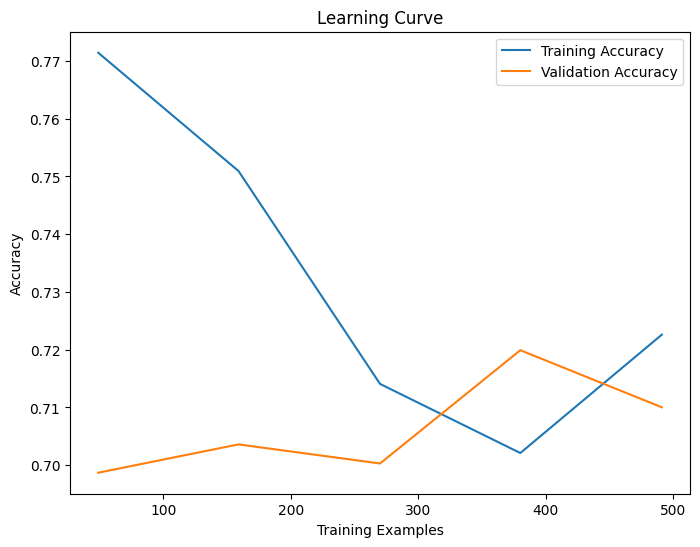

In [ ]:
# Standardize features (important for Perceptron)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Perceptron model
perceptron = Perceptron(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'max_iter': [100, 200, 500, 1000],
    'eta0': [0.001, 0.01, 0.1, 1.0],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=perceptron, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_max_iter = grid_search.best_params_['max_iter']
best_eta0 = grid_search.best_params_['eta0']
best_tol = grid_search.best_params_['tol']

# Train the Perceptron model with the best hyperparameters
perceptron = Perceptron(max_iter=best_max_iter, eta0=best_eta0, tol=best_tol, random_state=42)
perceptron.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage

# Print the test accuracy and best hyperparameters
print(f"Test Accuracy: {accuracy:.2f}%")
print(f"Best max_iter: {best_max_iter}, Best eta0: {best_eta0}, Best tol: {best_tol}")

# Plot the heatmap of accuracy scores
results = grid_search.cv_results_
mean_test_scores = np.array(results['mean_test_score'])
scores = mean_test_scores.reshape(len(param_grid['max_iter']), len(param_grid['eta0']), len(param_grid['tol']))

# Plot the heatmap
fig, ax = plt.subplots()
cax = ax.matshow(scores[:, :, 0], cmap='viridis')  # Adjust the index [0] for tol variations
fig.colorbar(cax)
ax.set_xticks(np.arange(len(param_grid['eta0'])))
ax.set_yticks(np.arange(len(param_grid['max_iter'])))
ax.set_xticklabels(param_grid['eta0'])
ax.set_yticklabels(param_grid['max_iter'])
ax.set_xlabel('eta0')
ax.set_ylabel('max_iter')
plt.title('Grid Search Mean Test Scores')
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Negative', 'Positive'], normalize=True, title='Normalized Confusion Matrix')
plt.show()

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(perceptron, X_train, y_train, cv=5, scoring='accuracy')
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()